In [1]:
import ROOT

Welcome to JupyROOT 6.28/12


In [24]:
# Load .so file of dataModel
ROOT.gSystem.Load("../install/lib/libPixelTPCdata.so")
ROOT.gSystem.Load("../install/lib/libMCTrackdata.so")

#Set Style
ROOT.gROOT.SetStyle("BELLE2")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myc


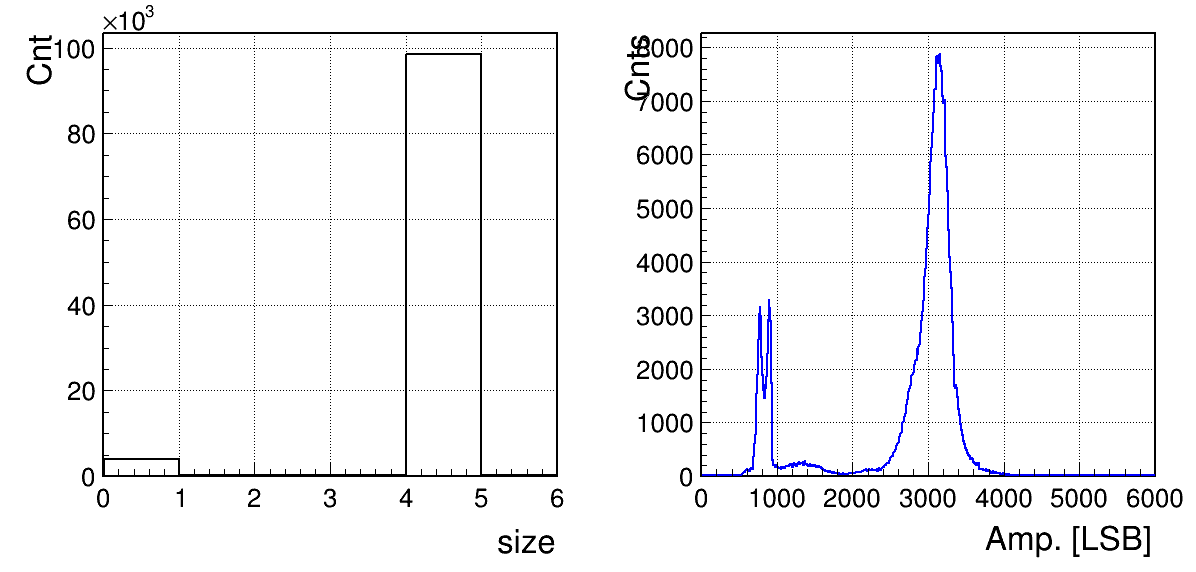

In [27]:
# Open file
file = ROOT.TFile.Open("../task/Rawexpdata8chips_0.root")
t1 = file.Get("PixTPCdata")
#print(t1.GetEntries())

#read tree
dataTable = ROOT.PixelTPCdata(8)
t1.SetBranchAddress("pixelTPCdata",dataTable)

hchip_chn_size = ROOT.TH1F("hsize",";size;Cnt",6,0,6)
hQ = ROOT.TH1F("hQ",";Amp. [LSB];Cnts",600,0,6000)
hQ.SetLineColor(ROOT.kBlue)
hQ.SetStats(1)

for entry_i in range(100):
    t1.GetEntry(entry_i)
    for chip_id in range(8):
        for chn_id in range(128):
            vecSingleChn = dataTable.Getdata_IJ(chip_id,chn_id)
            hchip_chn_size.Fill(len(vecSingleChn))
            for overthresh in range(len(vecSingleChn)):
                hQ.Fill(vecSingleChn.at(overthresh).second)


myc = ROOT.TCanvas("myc","myc",1200,600)
#myc.SetGrid()
myc.Divide(2,1)
myc.cd(1)
ROOT.gPad.SetGrid()
hchip_chn_size.Draw()
myc.cd(2)
ROOT.gPad.SetGrid()
hQ.Draw()
myc.Draw()